In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions  #we

In [2]:
df = pd.DataFrame()

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [3]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

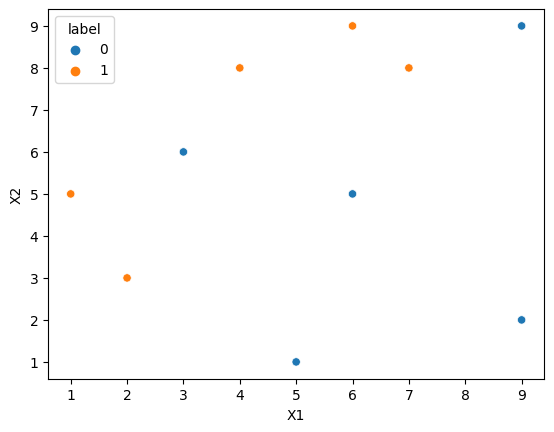

In [4]:
#plot the dataset
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [5]:
df['weights'] = 1/df.shape[0]

In [6]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt1 = DecisionTreeClassifier(max_depth=1) # create decsion tree classifieer with decsion stump (max dept=1)

In [9]:
# extract X and y
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [10]:
#train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

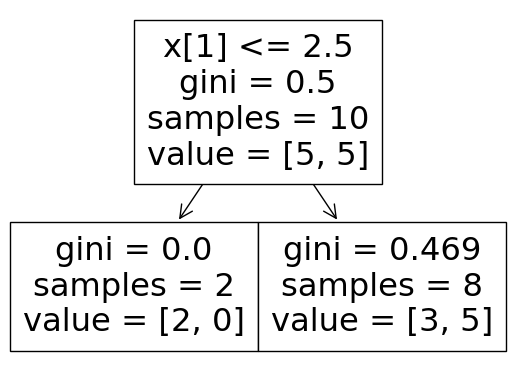

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)


<Axes: >

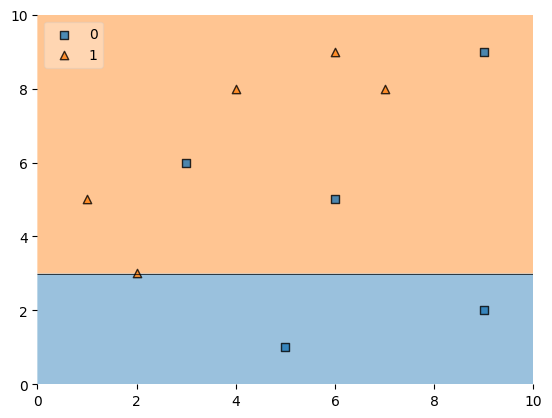

In [12]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [13]:
df['y_pred'] = dt1.predict(X)

In [14]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [15]:
# function to compute the model weight
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [16]:
#Calculate the weight of the first model based on its error rate
alpha1 = calculate_model_weight(0.3)  # 3 misclassification weigts (in this case 3 misclassification)
alpha1

0.42364893019360184

In [17]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [18]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [19]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [20]:
# the sum of the update may be less then 1
df['updated_weights'].sum()

0.9165153319682015

In [22]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [24]:
df['nomalized_weights'].sum()

1.0

In [25]:
# Now we will create the range
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [26]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [27]:
# see the range
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [28]:
# we will use random number generator
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']: # check the range and get the index
        indices.append(index)
  return indices

In [33]:
index_values = create_new_dataset(df)
index_values

[8, 4, 2, 1, 1, 8, 7, 3, 2, 0]

In [35]:
# create new dataframe from old dataframe with the rows selected above and the respective colums.
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
8,9,9,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [36]:
# make second decsion tree
dt2 = DecisionTreeClassifier(max_depth=1)

In [37]:
# get the features and outputs
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]')]

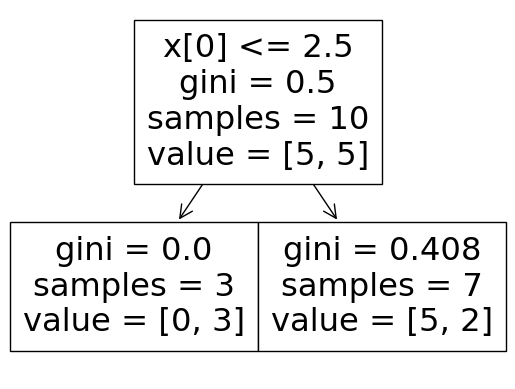

In [38]:
# train the decsion tree on the new data
dt2.fit(X,y)
plot_tree(dt2)

<Axes: >

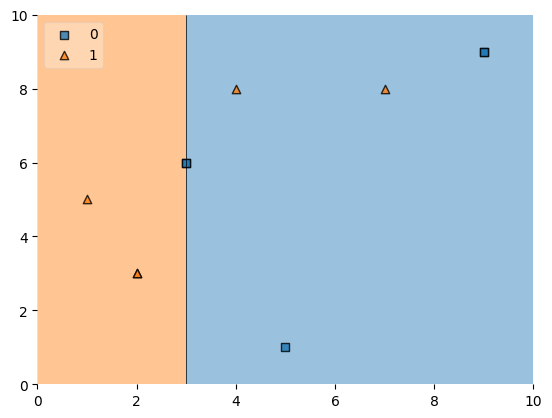

In [39]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [40]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,0
3,4,8,1,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1


In [44]:
# note when there is no misclassification then error may be zero.
#then it will be problem. then you can add a very small number to overcome this proble. in scikit it is solved.
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [48]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [49]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
3,4,8,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622


In [50]:
# normalise the weights
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df


,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
8,9,9,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,0,0.297427,0.344313
3,4,8,1,0.1,0,0.297427,0.344313
2,3,6,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922


In [51]:
# computer the sum of normalized weights
second_df['nomalized_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.038922,0.000000,0.038922
4,5,1,0,0.1,0,0.038922,0.038922,0.077843
2,3,6,0,0.1,0,0.038922,0.077843,0.116765
1,2,3,1,0.1,1,0.038922,0.116765,0.155687
1,2,3,1,0.1,1,0.038922,0.155687,0.194608
8,9,9,0,0.1,0,0.038922,0.194608,0.233530
7,7,8,1,0.1,0,0.344313,0.233530,0.577843
3,4,8,1,0.1,0,0.344313,0.577843,0.922157
2,3,6,0,0.1,0,0.038922,0.922157,0.961078
0,1,5,1,0.1,1,0.038922,0.961078,1.000000
